In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import random
import pandas as pd

In [77]:
def ode_demo(y,t,b,g,m):
    """
    Differential equation of a SIR model with equal birth and deathrate.
    
    Arguments:
    y -- 
    t -- time index (days)
    b -- beta parameter (infectiousness)
    g -- gamma parameter (recovery rate)
    m -- mu parameter (birth and deathrate)
    """
    s,i,r = y
    dsdt = m - b * s * i - m * s
    didt = b * s * i - g * i - m * i
    drdt = g * i - m * r
    
    return dsdt, didt, drdt


def SIR_events(S,I,R,p):
    
    extinctions = 0
    # Death S
    if p == 0:
        S.append(S[-1] - 1 + 1)
        I.append(I[-1])
        R.append(R[-1])
    
    # Infection
    elif p == 1:
        S.append(S[-1] - 1)
        I.append(I[-1] + 1)
        R.append(R[-1])
        
    # Death I
    elif p == 2:
        S.append(S[-1] + 1)
        I.append(I[-1] - 1)
        R.append(R[-1])
    
    # Recovered
    elif p == 3:
        S.append(S[-1])
        I.append(I[-1] - 1)
        R.append(R[-1] + 1)
    
    # Death R
    elif p == 4:
        S.append(S[-1] + 1)
        I.append(I[-1])
        R.append(R[-1] - 1)
        
    # Import
    elif p == 5:
        S.append(S[-1] - 1)
        I.append(I[-1] + 1)
        R.append(R[-1])
        
    return S, I, R, extinctions


def SIR_Events(p):
    # Death S
    if p == 0:
        # S, I, R
        return 0,0,0
    
    # Infection
    elif p == 1:
        # S, I, R
        return -1,1,0
        
    # Death I
    elif p == 2:
        # S, I, R
        return 1,-1,0
    
    # Recovered
    elif p == 3:
        # S, I, R
        return 0,-1,1
    
    # Death R
    elif p == 4:
        # S, I, R
        return 1,0,-1
        
    # Import
    elif p == 5:
        # S, I, R
        return -1,1,0
    
        
def SIR_demo(n, max_t, beta, gamma, mu):
    # Set starting values
    S = [0.99*n]
    I = [0.01*n]
    R = [0]
    t = [0]
    current_t = 0
    
    while t[-1] < max_t:
        # Set rates and calculate rate sum
        rates = [mu * S[-1], beta * S[-1] * I[-1] / n,  # rate(S)
                mu * I[-1], gamma * I[-1],  # rate(I)
                mu * R[-1]]  # rate(R)
        rates_sum = sum(rates)
        
        # Get first time step
        current_t += -1*np.log(np.random.random()) / rates_sum
        
        # Calculate all events for 100 time steps
        dS, dI, dR, de = 0, 0, 0, 0
        while current_t < max_t * 0.001:  
            # Get the event
            rand = np.random.random()
            p = 0
            for i in range(len(rates)):
                if rand * rates_sum < sum(rates[:i+1]):
                    p = i
                    break
            
            # Get changes of event
            temp_dS, temp_dI, temp_dR = SIR_Events(p)
            dS += temp_dS
            dI += temp_dI
            dR += temp_dR
            current_t += -1*np.log(np.random.random()) / rates_sum
            
            # Set rates
            rates = [mu * (S[-1] + dS), beta * (S[-1] + dS) * (I[-1] + dI) / n,  # rate(S)
                    mu * (I[-1] + dI), gamma * (I[-1] + dI),  # rate(I)
                    mu * (R[-1] + dR)]  # rate(R)
            rates_sum = sum(rates)
        
        # Add new 
        t.append(t[-1] + current_t)
        current_t = 0
        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)

    return S, I, R

# def SIR_Demo(n, max_t, beta, gamma, mu):
#     S = [0.99*n]
#     I = [0.01*n]
#     R = [0]
#     t = [0]
    
#     while t[-1] < max_t:
#         # Set rates
#         rates = [mu * S[-1], beta * S[-1] * I[-1] / n,  # rate(S)
#                 mu * I[-1], gamma * I[-1],  # rate(I)
#                 mu * R[-1]]  # rate(R)

#         rates_sum = sum(rates)
#         dt = -1*np.log(np.random.random()) / rates_sum
#         t.append(t[-1] + dt)

#         rand = np.random.random()
        
#         p = 0
#         for i in range(len(rates)):
#             if rand * rates_sum < sum(rates[:i+1]):
#                 p = i
#                 break
        
#         dS, dI, dR = SIR_Events(p)
#         S.append(S[-1] + dS)
#         I.append(I[-1] + dI)
#         R.append(R[-1] + dR)

#     return S, I, R, t

# def SIR_import(n, max_t, beta, gamma, mu, epsilon):
#     S = [0.99*n]
#     I = [0.01*n]
#     R = [0]
#     t = [0]
#     extinctions = 0

#     while t[-1] < max_t:
#         # Set rates
#         rates = [mu * S[-1], beta * S[-1] * I[-1] / n,  # rate(S)
#                 mu * I[-1], gamma * I[-1],  # rate(I)
#                 mu * R[-1],  # rate(R)
#                 epsilon * S[-1]] # Import

#         rates_sum = sum(rates)
#         dt = -1*np.log(np.random.random()) / rates_sum
#         t.append(t[-1] + dt)

#         rand = np.random.random()
        
#         p = 0
#         for i in range(len(rates)):
#             if rand * rates_sum < sum(rates[:i+1]):
#                 p = i
#                 break
                
#         S, I, R, e = SIR_events(S,I,R,p)
#         extinctions += e

#     return S, I, R, t, extinctions

def SIR_Import(n, max_t, beta, gamma, mu, epsilon):
    S = [0.99*n]
    I = [0.01*n]
    R = [0]
    t = [0]
    extinctions = 0
    current_t = 0

    while t[-1] < max_t:
        # Set rates
        rates = [mu * S[-1], beta * S[-1] * I[-1] / n,  # rate(S)
                mu * I[-1], gamma * I[-1],  # rate(I)
                mu * R[-1],  # rate(R)
                epsilon * S[-1]] # Import
        rates_sum = sum(rates)
        
        current_t += -1*np.log(np.random.random()) / rates_sum
        
        # Calculate all events for 100 time steps
        dS, dI, dR, de = 0, 0, 0, 0
        while current_t < max_t * 0.001:
            # Get the event
            rand = np.random.random()
            p = 0
            for i in range(len(rates)):
                if rand * rates_sum < sum(rates[:i+1]):
                    p = i
                    break
            
            # Get changes of event
            temp_dS, temp_dI, temp_dR = SIR_Events(p)
            dS += temp_dS
            dI += temp_dI
            dR += temp_dR
            current_t += -1*np.log(np.random.random()) / rates_sum
            
            # Set rates
            rates = [mu * (S[-1] + dS), beta * (S[-1] + dS) * (I[-1] + dI) / n,  # rate(S)
                    mu * (I[-1] + dI), gamma * (I[-1] + dI),  # rate(I)
                    mu * (R[-1] + dR),
                    epsilon * (S[-1] + dS)]  # rate(R)
            rates_sum = sum(rates)
        
        if dI == 0 and I[-1] != 0:
            extinctions += 1
            
        # Add new 
        t.append(t[-1] + current_t)
        current_t = 0
        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)

    return S, I, R, extinctions

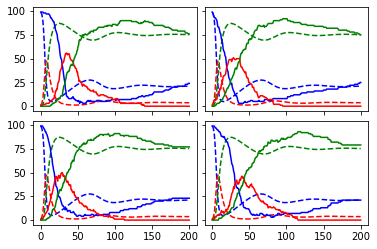

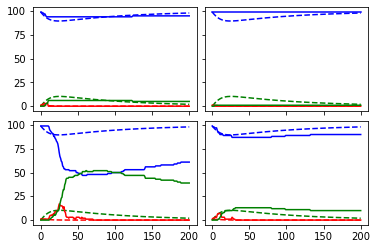

In [109]:
beta = 1.0
gamma = 0.2
mu = 0.01
population = 100
max_t = 200

# Do stochastic 3 times
s1, i1, r1 = SIR_demo(population, max_t, beta, gamma, mu)
t1 = np.linspace(0,max_t,len(s1))
s2, i2, r2 = SIR_demo(population, max_t, beta, gamma, mu)
t2 = np.linspace(0,max_t,len(s2))
s3, i3, r3 = SIR_demo(population, max_t, beta, gamma, mu)
t3 = np.linspace(0,max_t,len(s3))
s4, i4, r4 = SIR_demo(population, max_t, beta, gamma, mu)
t4 = np.linspace(0,max_t,len(s4))
s = [s1, s2, s3, s4]
i = [i1, i2, i3, i4]
r = [r1, r2, r3, r4]
t = [t1, t2, t3, t4]

# Integrate ODE using odeint
time = np.linspace(0, max_t, len(s[0]))
y0 = 0.99, 0.01, 0
integrated = odeint(ode_demo, y0, time, args=(beta, gamma, mu))
s_ode, i_ode, r_ode = integrated.T

# Create subplot
f, ax = plt.subplots(2,2)
index = 0
for row in ax:
    for col in row:
        # Plot deterministic
        col.plot(time, s_ode*population, color='b', linestyle='--')
        col.plot(time, i_ode*population, color='r', linestyle='--')
        col.plot(time, r_ode*population, color='g', linestyle='--')
        # Plot stochastic
        col.plot(t[index], s[index], color='b')
        col.plot(t[index], i[index], color='r')
        col.plot(t[index], r[index], color='g')
        
        if index < 2:
            col.tick_params(axis='x', which='both', labelbottom=False)
        if index % 2 != 0:
            col.tick_params(axis='y', which='both', labelleft=False)
            
        index += 1
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig("figs/variability_demo_epi", dpi=400)        
plt.show()


beta = 1.0
gamma = 1.0
mu = 0.01
population = 100
max_t = 200

# Do stochastic 3 times
s1, i1, r1 = SIR_demo(population, max_t, beta, gamma, mu)
t1 = np.linspace(0,max_t,len(s1))
s2, i2, r2 = SIR_demo(population, max_t, beta, gamma, mu)
t2 = np.linspace(0,max_t,len(s2))
s3, i3, r3 = SIR_demo(population, max_t, beta, gamma, mu)
t3 = np.linspace(0,max_t,len(s3))
s4, i4, r4 = SIR_demo(population, max_t, beta, gamma, mu)
t4 = np.linspace(0,max_t,len(s4))
s = [s1, s2, s3, s4]
i = [i1, i2, i3, i4]
r = [r1, r2, r3, r4]
t = [t1, t2, t3, t4]

# Integrate ODE using odeint
time = np.linspace(0, max_t, len(s[0]))
y0 = 0.99, 0.01, 0
integrated = odeint(ode_demo, y0, time, args=(beta, gamma, mu))
s_ode, i_ode, r_ode = integrated.T

# Create subplot
f, ax = plt.subplots(2,2)
index = 0
for row in ax:
    for col in row:
        # Plot deterministic
        col.plot(time, s_ode*population, color='b', linestyle='--')
        col.plot(time, i_ode*population, color='r', linestyle='--')
        col.plot(time, r_ode*population, color='g', linestyle='--')
        # Plot stochastic
        col.plot(t[index], s[index], color='b')
        col.plot(t[index], i[index], color='r')
        col.plot(t[index], r[index], color='g')
        
        if index < 2:
            col.tick_params(axis='x', which='both', labelbottom=False)
        if index % 2 != 0:
            col.tick_params(axis='y', which='both', labelleft=False)
            
        index += 1
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig("figs/variability_demo_nonepi", dpi=400)        
plt.show()

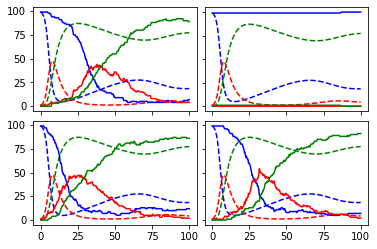

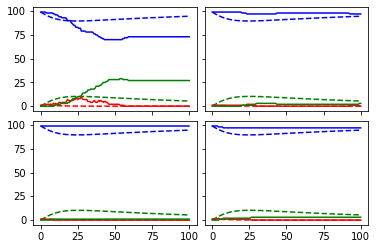

In [110]:
beta = 1.0
gamma = 0.2
mu = 0.01
population = 100
max_t = 100
epsilon = 5.5 * 10 ** -5 * np.sqrt(population) # TODO: Klopt dit wel? Kijk in boek

# Do stochastic 3 times
s1, i1, r1, e = SIR_Import(population, max_t, beta, gamma, mu, epsilon)
t1 = np.linspace(0,max_t,len(s1))
s2, i2, r2, e = SIR_Import(population, max_t, beta, gamma, mu, epsilon)
t2 = np.linspace(0,max_t,len(s2))
s3, i3, r3, e = SIR_Import(population, max_t, beta, gamma, mu, epsilon)
t3 = np.linspace(0,max_t,len(s3))
s4, i4, r4, e = SIR_Import(population, max_t, beta, gamma, mu, epsilon)
t4 = np.linspace(0,max_t,len(s4))
s = [s1, s2, s3, s4]
i = [i1, i2, i3, i4]
r = [r1, r2, r3, r4]
t = [t1, t2, t3, t4]

# Integrate ODE using odeint
time = np.linspace(0, max_t, len(s[0]))
y0 = 0.99, 0.01, 0
integrated = odeint(ode_demo, y0, time, args=(beta, gamma, mu))
s_ode, i_ode, r_ode = integrated.T

# Create subplot
f, ax = plt.subplots(2,2)
index = 0
for row in ax:
    for col in row:
        # Plot deterministic
        col.plot(time, s_ode*population, color='b', linestyle='--')
        col.plot(time, i_ode*population, color='r', linestyle='--')
        col.plot(time, r_ode*population, color='g', linestyle='--')
        # Plot stochastic
        col.plot(t[index], s[index], color='b')
        col.plot(t[index], i[index], color='r')
        col.plot(t[index], r[index], color='g')
        
        if index < 2:
            col.tick_params(axis='x', which='both', labelbottom=False)
        if index % 2 != 0:
            col.tick_params(axis='y', which='both', labelleft=False)
            
        index += 1
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig("figs/variability_import_epi", dpi=400)        
plt.show()

beta = 1.0
gamma = 1.0
mu = 0.01
population = 100
max_t = 100
epsilon = 5.5 * 10 ** -5 * np.sqrt(population) # TODO: Klopt dit wel? Kijk in boek

# Do stochastic 3 times
s1, i1, r1, e = SIR_Import(population, max_t, beta, gamma, mu, epsilon)
t1 = np.linspace(0,max_t,len(s1))
s2, i2, r2, e = SIR_Import(population, max_t, beta, gamma, mu, epsilon)
t2 = np.linspace(0,max_t,len(s2))
s3, i3, r3, e = SIR_Import(population, max_t, beta, gamma, mu, epsilon)
t3 = np.linspace(0,max_t,len(s3))
s4, i4, r4, e = SIR_Import(population, max_t, beta, gamma, mu, epsilon)
t4 = np.linspace(0,max_t,len(s4))
s = [s1, s2, s3, s4]
i = [i1, i2, i3, i4]
r = [r1, r2, r3, r4]
t = [t1, t2, t3, t4]

# Integrate ODE using odeint
time = np.linspace(0, max_t, len(s[0]))
y0 = 0.99, 0.01, 0
integrated = odeint(ode_demo, y0, time, args=(beta, gamma, mu))
s_ode, i_ode, r_ode = integrated.T

# Create subplot
f, ax = plt.subplots(2,2)
index = 0
for row in ax:
    for col in row:
        # Plot deterministic
        col.plot(time, s_ode*population, color='b', linestyle='--')
        col.plot(time, i_ode*population, color='r', linestyle='--')
        col.plot(time, r_ode*population, color='g', linestyle='--')
        # Plot stochastic
        col.plot(t[index], s[index], color='b')
        col.plot(t[index], i[index], color='r')
        col.plot(t[index], r[index], color='g')
        
        if index < 2:
            col.tick_params(axis='x', which='both', labelbottom=False)
        if index % 2 != 0:
            col.tick_params(axis='y', which='both', labelleft=False)
            
        index += 1
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.savefig("figs/variability_import_nonepi", dpi=400)        
plt.show()

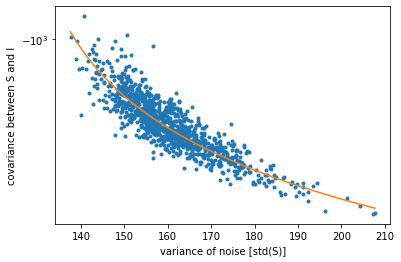

In [4]:
beta = 2
gamma = 0.5
mu = 0.1
population = 1000
max_t = 60
epsilon = 5.5 * 10 ** (-5) * np.sqrt(population)
covlist= []
noiselist = []


for i in range(1000):
    S, I, R, T, Ext = SIR_import(population, max_t, beta, gamma, mu, epsilon)
    cov = np.cov(S, I)[0, 1]
    covlist.append(cov)
    noise = np.std(S)
    noiselist.append(noise)


m, b = np.polyfit(noiselist, covlist, 1)  # fit line through data

x = np.sort(np.array(noiselist))

plt.figure()
plt.plot(noiselist, covlist, '.')
plt.plot(x, m*x+b)
#plt.xscale('symlog')
plt.yscale('symlog', linthresh=0.01)
#plt.ylim(np.min(covlist)*1.5, 0)
plt.xlabel('variance of noise [std(S)]')
plt.ylabel('covariance between S and I')
plt.show()